## Imports

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv("../data/Final_students_data.csv")

## Class

In [41]:
class GraphMining:
    def __init__(self, df):
        self.df = df

    def create_graph_by_name(self, name):
        courses = self.split_certificates(name)
        rows = self.df[self.df["Name"] == name]
        if len(rows) == 0:
            return "No Matching Certification"
        else:
            for i, row in rows.iterrows():
                G = nx.Graph()

                for row in courses:
                    for course in row:
                        G.add_edge(name, course, weight=1)
                        break
                break

            self.plot_graph(G, name)

    def create_graph_by_certificate(self, certificate):

        rows = self.df[self.df["Certifications"] == certificate]
        if len(rows) == 0:
            return "No Matching Certification"
        else:
            nodes =[]
            edges =[]
            projects =[]
            for i, row in rows.iterrows():
                nodes.append(row["Certifications"])
                edges.append(row["Name"])
                projects.append(row["Project Count"])
            g = pd.DataFrame({"source":nodes,"target":edges,"weight":projects})

            Y = nx.from_pandas_edgelist(g, edge_attr="weight", create_using=nx.DiGraph())

            pos = nx.spring_layout(Y)
            nx.draw_networkx(Y, pos, with_labels=True, node_size=700)
            labels = nx.get_edge_attributes(Y, "weight")
            nx.draw_networkx_edge_labels(Y, pos, edge_labels=labels)


    def plot_graph(self, G, name):
            pos = nx.spring_layout(G)
            nx.draw_networkx(
                G, pos, with_labels=True, node_size=700
            )
            plt.title(f"Certificates for {name}")
            plt.show()

    def split_certificates(self, name):
            rows = self.df[self.df["Name"] == name]

            courses = rows["Programming Languages"].apply(lambda x: x.split("; "))
            return courses

## Task 3

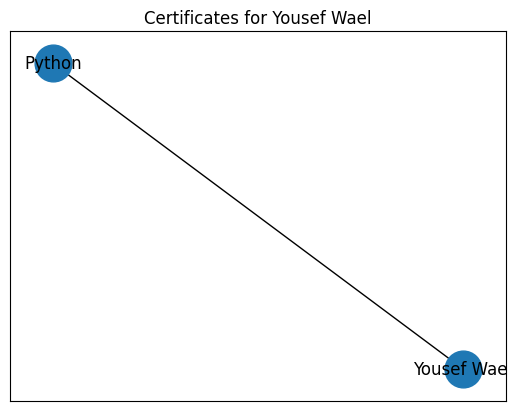

In [42]:
miner = GraphMining(df)


miner.create_graph_by_name("Yousef Wael")

## Task 4

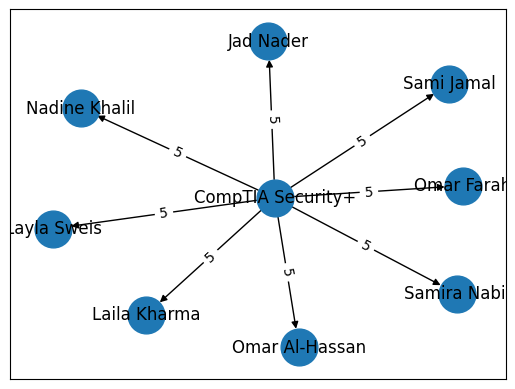

In [43]:
miner.create_graph_by_certificate("CompTIA Security+")

In [44]:
print("Hello User! Enter a certification name to get the associated students")
certificate = input("Enter a Certifcate name")
print("Processing Query..")
print("Results:")
miner.create_graph_by_certificate(certificate)

Hello User! Enter a certification name to get the associated students
Processing Query..
Results:


'No Matching Certification'